In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'Dataset/'
data_test_path = 'Test/'
data_val_path = 'Validation/'

In [3]:
img_width = 256
img_height =256 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 18000 files belonging to 9 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['anticlockwise',
 'backward',
 'clockwise',
 'down',
 'forward',
 'left',
 'right',
 'up',
 'wave']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=True,
                                                       validation_split=False)

Found 900 files belonging to 9 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 2700 files belonging to 9 classes.


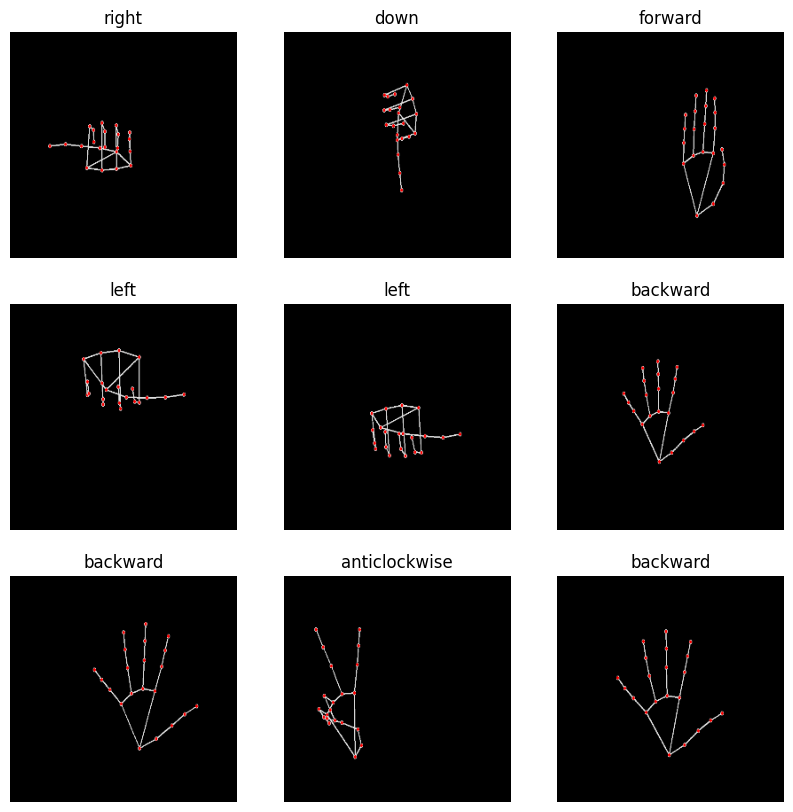

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(62,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 2062s 4s/step - accuracy: 0.7891 - loss: 0.6230 - val_accuracy: 0.8511 - val_loss: 0.5903
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1913s 3s/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.7989 - val_loss: 0.8278
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1756s 3s/step - accuracy: 0.9940 - loss: 0.0198 - val_accuracy: 0.8811 - val_loss: 0.7052
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 43947s 78s/step - accuracy: 0.9947 - loss: 0.0177 - val_accuracy: 0.9011 - val_loss: 0.6795
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 1655s 3s/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9056 - val_loss: 0.8765


Text(0.5, 1.0, 'Loss')

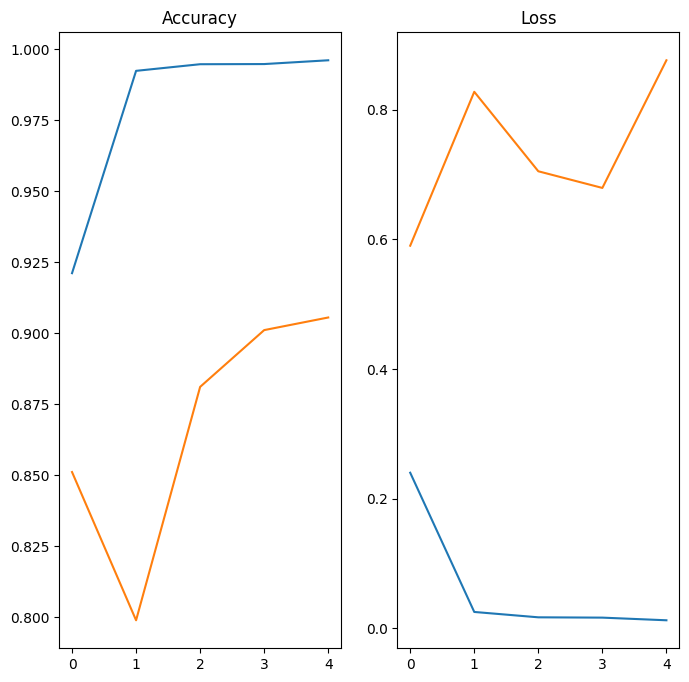

In [33]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [24]:
image = 'Test/anticlockwise/frame_1714026720257.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [25]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [26]:
score = tf.nn.softmax(predict)

In [27]:
score[0]

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([9.9999976e-01, 1.9484562e-12, 4.2681435e-08, 1.5783358e-15,
       4.8295079e-12, 1.9867509e-22, 6.0388586e-20, 1.8733289e-07,
       5.0501523e-16], dtype=float32)>

In [29]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is anticlockwise with accuracy of 100.00


In [28]:
model.save('Image_classify.keras')

85/85 ━━━━━━━━━━━━━━━━━━━━ 74s 860ms/step


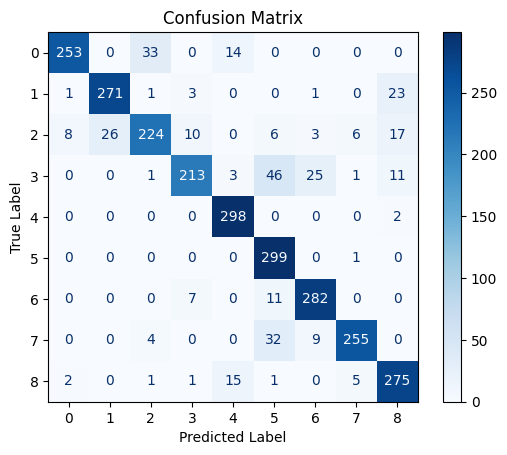

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Use the model to predict labels for the test dataset
predictions = model.predict(data_test)

# Step 2: Extract the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Generate the confusion matrix
true_labels = np.concatenate([y for x, y in data_test], axis=0)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Step 4: Visualize the confusion matrix
classes = [str(i) for i in range(conf_matrix.shape[0])]  # Assuming class labels are integers
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [31]:
plt.savefig('confusion_matrix.png')

<Figure size 640x480 with 0 Axes>